<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузим-данные-и-изучим-их" data-toc-modified-id="Загрузим-данные-и-изучим-их-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузим данные и изучим их</a></span></li><li><span><a href="#Выполним-ресемплирование" data-toc-modified-id="Выполним-ресемплирование-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выполним ресемплирование</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Распределение-временного-ряда" data-toc-modified-id="Распределение-временного-ряда-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Распределение временного ряда</a></span></li><li><span><a href="#Тренды-и-сезонность" data-toc-modified-id="Тренды-и-сезонность-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тренды и сезонность</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Добавление-признаков" data-toc-modified-id="Добавление-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Добавление признаков</a></span></li><li><span><a href="#Разобьём-данные-на-выборки" data-toc-modified-id="Разобьём-данные-на-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Разобьём данные на выборки</a></span></li><li><span><a href="#Обучающее-дерево" data-toc-modified-id="Обучающее-дерево-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Напишем-функцию-для-дальнейшей-проверки-разных-моделей" data-toc-modified-id="Напишем-функцию-для-дальнейшей-проверки-разных-моделей-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Напишем функцию для дальнейшей проверки разных моделей</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Обучающее-дерево" data-toc-modified-id="Обучающее-дерево-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Визуализация-предсказания-и-вывод" data-toc-modified-id="Визуализация-предсказания-и-вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Визуализация предсказания и вывод</a></span></li></ul></li></ul></div>

#  Прогноз количества заказов такси

Требуется разработать модель для прогнозирования числа заказов на следующий час для такси.
Заказчик предоставил исторические данные о заказах такси в аэропортах. Результаты исследования нужны заказчику, чтобы  привлекать больше водителей в период пиковой нагрузки и не терять заказы.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

## Подготовка

Чтобы изучить данные, сделать необходимые рассчёты и провести исследование, сразу импортируем библиотеки, который нам потребуются в данном проекте:

In [1]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Загрузим данные и изучим их

Напишем функцию, которая будет отображать основные показатели датасета и строить корреляционную матрицу

In [2]:
def df_info(df):
    """Изучение датасета"""
    print('\nПервые 10 строчек датафрейма')
    display(df.head(10))
    print('\nИнформация о датафрейме\n')
    display(df.info())
    print('\nРасчёт значений в каждом столбце')
    display(df.describe())
    print('\nКоличество дубликатов =', df.duplicated().sum())
    print('\nЧисло пропусков в каждом столбце')
    display(df.isna().sum())

Прочитаем файл и сохраним его

In [3]:
df = pd.read_csv('C:\\Users\\Дмитрий\\github\\projects\\projects\\Forecast of the number of taxi orders\\taxi.csv', index_col=[0], parse_dates=[0])

Изучим датасет

In [4]:
df_info(df)


Первые 10 строчек датафрейма


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17



Информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None


Расчёт значений в каждом столбце


,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000



Количество дубликатов = 26415

Число пропусков в каждом столбце


num_orders    0
dtype: int64

В таблице 26496 строк и 1 столбец. Типы данных в столбце - int64.
<br>Изначально в таблице было 2 столбца, но дату и время мы приравняли к индексу.
<br>Согласно документации `num_orders` - колличество заказов.


**Вывод**
<br><br>В данных встречаются дубликаты, но их удалять мы не будем, тк это одинаковое число заказов на интервале времени.
<br>Пропусков в данных нет.
<br>Можно утверждать, что данные готовы для анализа, исследования, обучения моделей и тестирования.

### Выполним ресемплирование

Выполним ресемплирование по одному часу, тк у ТЗ требуется спрогнозировать число заказов такси на следующих час

In [5]:
df.sort_index(inplace=True)
df = df.resample('1H').sum()

Посмотрим ресемплированные данные 

In [6]:
df_info(df)


Первые 10 строчек датафрейма


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34



Информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


None


Расчёт значений в каждом столбце


,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000



Количество дубликатов = 4165

Число пропусков в каждом столбце


num_orders    0
dtype: int64

**Вывод**
<br><br>После ресемплирования данных стало меньше, тк раньше были указаны интервалы по  10 минут, а  теперь по часу.
<br>В рамках поставленной задачи нужны прогнозы количества заказно на следующий час, следовательно теперь данные больше подходят для дальнейшей работы с ними.

## Анализ

### Распределение временного ряда

Посмотрим на значения ряда на всём доступном интервале и наложим скользящее среднее и скользящее стандартное отклонение

<AxesSubplot:xlabel='datetime'>

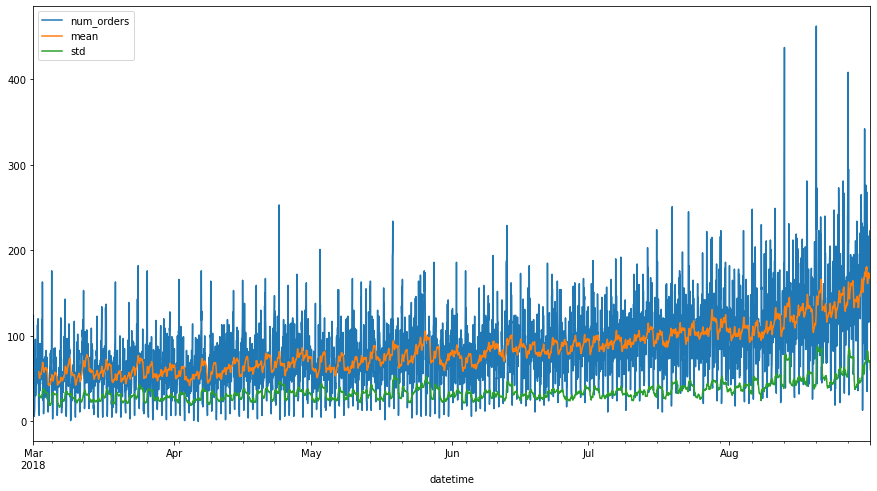

In [7]:
df['mean'] = df['num_orders'].rolling(30).mean()
df['std'] = df['num_orders'].rolling(30).std()
df.plot(figsize=(15, 8))

**Вывод**
<br><br> По распределению значений на временном ряду видно, что ряд нестационарный, тк скользящее среднее и стандандартное скользящее отклонение постепенно увеличивается на всём временном интервале.
<br>Это говорит о том, что число заказов в «Чётеньком такси» постепенно увеличивается.

### Тренды и сезонность

Посмотрим тренды и сезонность на всём временном ряду

In [8]:
decomposed = seasonal_decompose(df['num_orders'])

Отобразим на графиках тренд, сезонность и остаток декомпозиции данного временного ряда

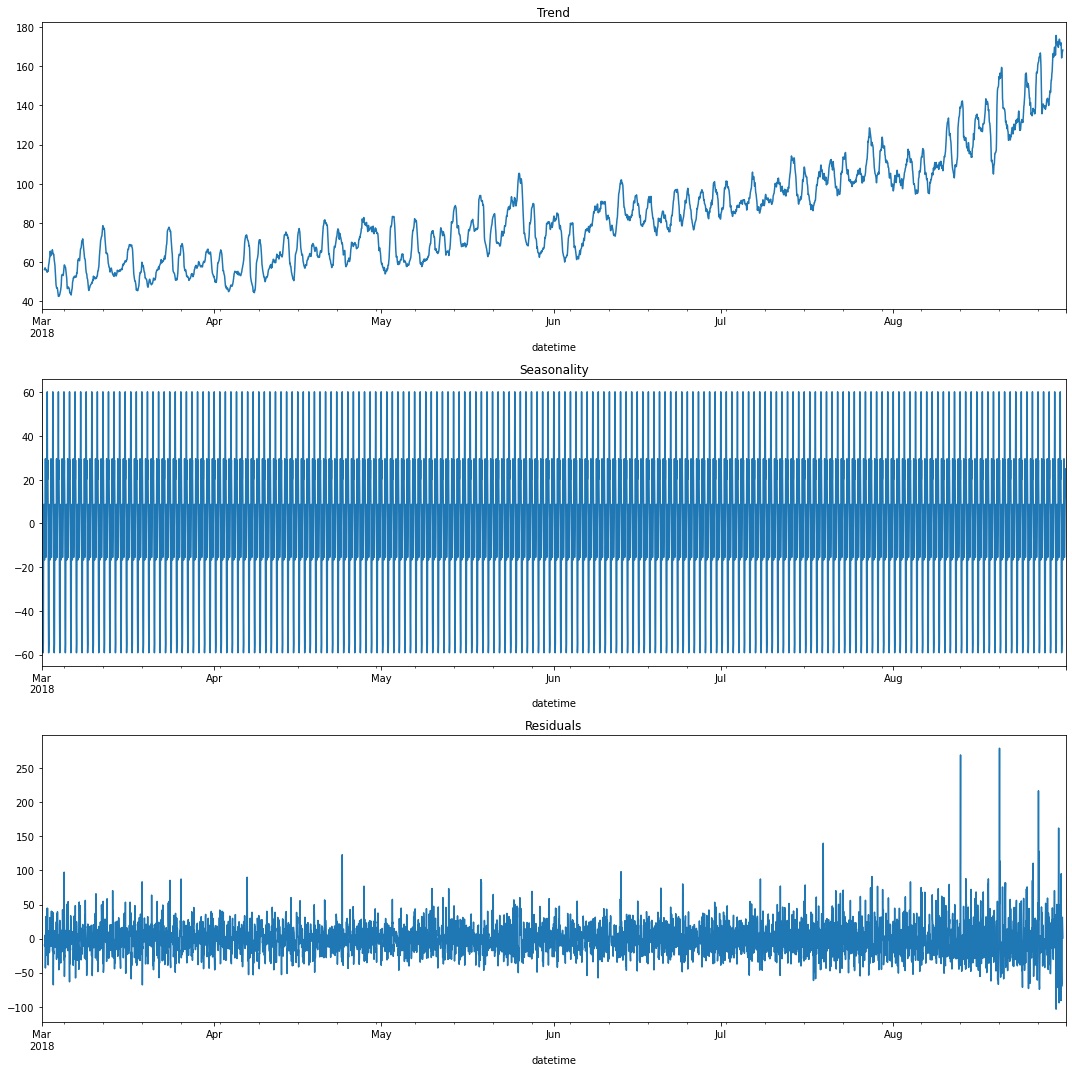

In [9]:
plt.figure(figsize=(15, 15))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Посмотрим сезонноть на 3 разных интервалах временного ряда

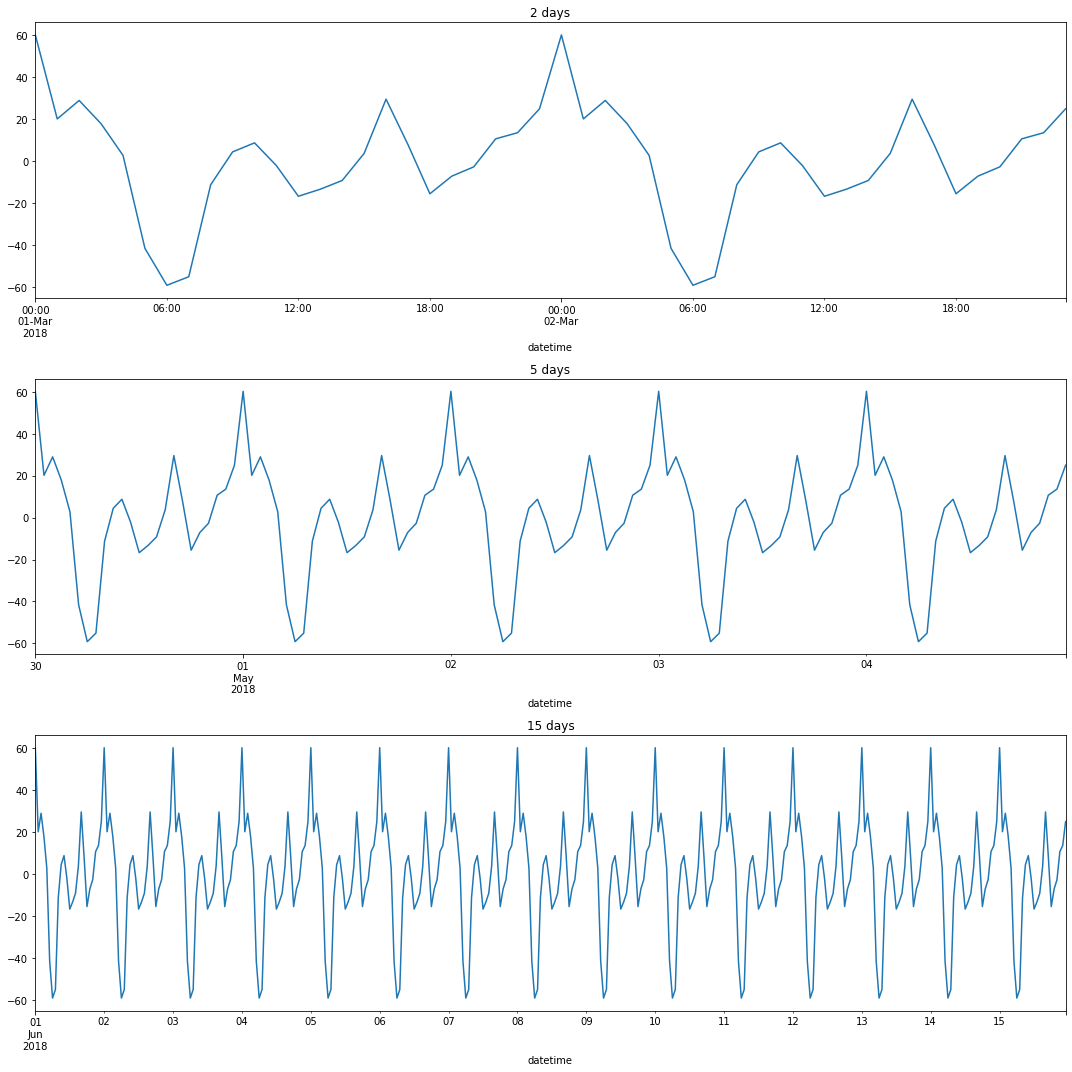

In [10]:
plt.figure(figsize=(15, 15))
plt.subplot(311)
decomposed.seasonal['2018-03-01':'2018-03-02'].plot(ax=plt.gca())
plt.title('2 days')
plt.subplot(312)
decomposed.seasonal['2018-04-30':'2018-05-04'].plot(ax=plt.gca())
plt.title('5 days')
plt.subplot(313)
decomposed.seasonal['2018-06-01':'2018-06-15'].plot(ax=plt.gca())
plt.title('15 days')
plt.tight_layout()

**Вывод**
<br><br> Тренд показывает, что число заказов в «Чётеньком такси» выросло за пол года в примерно 3 раза.
<br> Сезонность показывает, что с 0:00 до 6:00 число заказов уменьшается и достигает минимума в 6:00, далее начинается рост заказов с колебаниями в районе 12:00 и 18:00, далее снова рост и максимальное число заказов достигается в 23:00-24:00.

## Обучение

### Добавление признаков

Изначально посмотрим на имеющийся Датафрейм

In [11]:
df.head()

,num_orders,mean,std
datetime,,,
2018-03-01 00:00:00,124,NaN,NaN
2018-03-01 01:00:00,85,NaN,NaN
2018-03-01 02:00:00,71,NaN,NaN
2018-03-01 03:00:00,66,NaN,NaN
2018-03-01 04:00:00,43,NaN,NaN


Удалим лишние столбцы `mean, std`

In [12]:
df = df.drop(['mean', 'std'], axis=1)
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


Напишем функцию для добавления признаков

In [13]:
def make_features(df, max_lag, rolling_mean_size):
    data = df.copy(deep=True)
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data

Добавим признаки с помощью функции `make_features`

In [14]:
make_features(df, 20, 100)

,num_orders,year,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,...,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,1,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,2,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,3,71.0,85.0,124.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,2018,3,1,3,4,66.0,71.0,85.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,2018,8,31,4,19,207.0,217.0,197.0,116.0,...,46.0,35.0,78.0,268.0,99.0,230.0,194.0,276.0,246.0,157.33
2018-08-31 20:00:00,154,2018,8,31,4,20,136.0,207.0,217.0,197.0,...,182.0,46.0,35.0,78.0,268.0,99.0,230.0,194.0,276.0,156.74
2018-08-31 21:00:00,159,2018,8,31,4,21,154.0,136.0,207.0,217.0,...,203.0,182.0,46.0,35.0,78.0,268.0,99.0,230.0,194.0,156.63


**Вывод**
<br><br> 
Пока параметры для функции добавления признаков взяты произвольно, но далее в зависимости от результатов метрики RMSE можно будет изменить набор признаков.

### Разобьём данные на выборки

Сделаем 3 выборки - обучающую, валидационную и тестовую в пропорциях 80%, 10% и 10% соответственно.
<br>Для этого разделим весь датасет сначала в пропорциях 90% к 10%, а потом полученные 90% разделим на 89% и 11%, чтобы пропорции первого датасета были были 8:1:1.

In [15]:
train_valid, test = train_test_split(make_features(df, 20, 100), shuffle=False, test_size=0.1)
train, valid = train_test_split(train_valid, shuffle=False, test_size=0.11)
train = train.dropna()

Разделим учебную, валидационные и тестовые выборки на признаки и цели

In [16]:
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_valid = valid.drop(['num_orders'], axis=1)
target_valid = valid['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

**Вывод**

Мы разделили датафрейм на три выборки:
* обучающую, чтобы обучить модели
* валидационную, чтобы проверять модель и подберать гиперпараметры
* тестовую, чтобы правильно оценить готовую модель

### Обучающее дерево

Посмотрим на какой глубине дерева оптимально будет работать модель и будет выдавать наилучшее значение RMSE

In [17]:
%%time

best_model_tree = None
best_result_mean_squared_error = 1000000000
for i in range(1, 25):
    model_tree = DecisionTreeRegressor(max_depth = i) # зададим параметры модели обучающего дерева
    model_tree.fit(features_train, target_train) # обучаем модель на учебной выборке
    predictions_valid = model_tree.predict(features_valid) # проверим предсказания модели на валидационных признаках
    result_mean_squared_error = mean_squared_error(target_valid, predictions_valid)
    if result_mean_squared_error < best_result_mean_squared_error:
        best_result_mean_squared_error = result_mean_squared_error 
        best_model_tree = model_tree

print("MSE наилучшей модели на валидационной выборке:", best_result_mean_squared_error)
print("Средняя ошибка модели (RMSE):", best_result_mean_squared_error**0.5)
print("Наилучшая модель с параметрами:", best_model_tree)  

MSE наилучшей модели на валидационной выборке: 1348.0425860800412
Средняя ошибка модели (RMSE): 36.715699449691016
Наилучшая модель с параметрами: DecisionTreeRegressor(max_depth=6)
Wall time: 1.07 s


### Случайный лес

Посмотрим на какой глубине дерева и с каким числом деревьев оптимально будет работать модель и будет выдавать наилучшее значение RMSE

In [18]:
%%time

best_model_forest = None
best_result_mean_squared_error_forest = 1000000000
for est in range(1, 100, 5): # переберём с помощью цикла значения деревьев от 1 до 100
    for i in range(1, 10): # переберём с помощью цикла значения глубины деревьева от 1 до 15
        model_forest = RandomForestRegressor(n_estimators=est, max_depth = i) # зададим параметры модели случайный лес
        model_forest.fit(features_train, target_train)
        predictions_forest = model_forest.predict(features_valid)
        result_mean_squared_error_forest = mean_squared_error(target_valid, predictions_forest)
        if result_mean_squared_error_forest < best_result_mean_squared_error_forest: # выберем наилучшее значение метрики f1_score
            best_result_mean_squared_error_forest = result_mean_squared_error_forest 
            best_model_forest = model_forest

print("MSE наилучшей модели на валидационной выборке:", best_result_mean_squared_error_forest)
print("Средняя ошибка модели(RMSE):", best_result_mean_squared_error_forest**0.5)
print("Наилучшая модель с параметрами:", best_model_forest)

MSE наилучшей модели на валидационной выборке: 1039.9820216716455
Средняя ошибка модели(RMSE): 32.24875224984132
Наилучшая модель с параметрами: RandomForestRegressor(max_depth=9, n_estimators=41)
Wall time: 2min 5s


### Напишем функцию для дальнейшей проверки разных моделей

In [19]:
def model_train_valid(model_type):
    model = model_type
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    result = mean_squared_error(target_valid, predictions)
            
    return print("MSE наилучшей модели на валидационной выборке:", result, "\nСредняя ошибка модели(RMSE):", result**0.5)

### Линейная регрессия 

Посмотрим какой результат RMSE выдаст модель

In [20]:
model_train_valid(LinearRegression())

MSE наилучшей модели на валидационной выборке: 1463.7056099796866 
Средняя ошибка модели(RMSE): 38.2584057427866


### LightGBM

Посмотрим какой результат RMSE выдаст модель с параметрами `n_estimators=50, class_weight='balanced'`

In [21]:
%%time
model_train_valid(LGBMRegressor(n_estimators=50))

MSE наилучшей модели на валидационной выборке: 957.6005036077661 
Средняя ошибка модели(RMSE): 30.94512083685837
Wall time: 105 ms


Посмотрим какой результат RMSE выдаст модель с параметрами `n_estimators=100, num_leaves=20, class_weight='balanced'`

In [22]:
%%time
model_train_valid(LGBMRegressor(n_estimators=100, num_leaves=20))

MSE наилучшей модели на валидационной выборке: 968.4734266363716 
Средняя ошибка модели(RMSE): 31.1203056963837
Wall time: 95.9 ms


### CatBoost

Посмотрим какой результат RMSE выдаст модель с параметрами `loss_function="RMSE", iterations=200`

In [23]:
%%time
model_train_valid(CatBoostRegressor(loss_function="RMSE", iterations=200))

Learning rate set to 0.184136
0:	learn: 33.0185285	total: 59.8ms	remaining: 11.9s
1:	learn: 30.8706362	total: 64ms	remaining: 6.33s
2:	learn: 29.4466215	total: 68ms	remaining: 4.47s
3:	learn: 27.8999137	total: 72ms	remaining: 3.53s
4:	learn: 27.1624990	total: 75.9ms	remaining: 2.96s
5:	learn: 25.9136912	total: 79.9ms	remaining: 2.58s
6:	learn: 25.3768177	total: 84ms	remaining: 2.32s
7:	learn: 24.8501159	total: 88.1ms	remaining: 2.11s
8:	learn: 24.1563164	total: 91.9ms	remaining: 1.95s
9:	learn: 23.5949326	total: 95.9ms	remaining: 1.82s
10:	learn: 23.1299511	total: 99.8ms	remaining: 1.71s
11:	learn: 22.8321053	total: 104ms	remaining: 1.62s
12:	learn: 22.5698598	total: 108ms	remaining: 1.55s
13:	learn: 22.2879478	total: 111ms	remaining: 1.48s
14:	learn: 22.0346300	total: 115ms	remaining: 1.42s
15:	learn: 21.8059451	total: 119ms	remaining: 1.37s
16:	learn: 21.6088056	total: 125ms	remaining: 1.35s
17:	learn: 21.4680356	total: 131ms	remaining: 1.32s
18:	learn: 21.2939918	total: 135ms	remain

164:	learn: 13.0374757	total: 780ms	remaining: 165ms
165:	learn: 13.0084997	total: 784ms	remaining: 161ms
166:	learn: 12.9704087	total: 789ms	remaining: 156ms
167:	learn: 12.9536084	total: 793ms	remaining: 151ms
168:	learn: 12.9112161	total: 797ms	remaining: 146ms
169:	learn: 12.8846866	total: 801ms	remaining: 141ms
170:	learn: 12.8490721	total: 805ms	remaining: 137ms
171:	learn: 12.8113294	total: 809ms	remaining: 132ms
172:	learn: 12.7981573	total: 813ms	remaining: 127ms
173:	learn: 12.7703088	total: 817ms	remaining: 122ms
174:	learn: 12.7410870	total: 822ms	remaining: 117ms
175:	learn: 12.7014152	total: 826ms	remaining: 113ms
176:	learn: 12.6729382	total: 831ms	remaining: 108ms
177:	learn: 12.6469250	total: 835ms	remaining: 103ms
178:	learn: 12.6111595	total: 846ms	remaining: 99.2ms
179:	learn: 12.5908360	total: 851ms	remaining: 94.5ms
180:	learn: 12.5649278	total: 855ms	remaining: 89.7ms
181:	learn: 12.5632442	total: 859ms	remaining: 84.9ms
182:	learn: 12.5139623	total: 863ms	remain

Посмотрим какой результат RMSE выдаст модель с параметрами `loss_function="RMSE", iterations=1000, depth=10`

In [24]:
%%time
model_train_valid(CatBoostRegressor(loss_function="RMSE", iterations=1000, depth=10))

Learning rate set to 0.049759
0:	learn: 34.9136182	total: 75.5ms	remaining: 1m 15s
1:	learn: 34.0632004	total: 147ms	remaining: 1m 13s
2:	learn: 33.2940560	total: 214ms	remaining: 1m 11s
3:	learn: 32.6193856	total: 278ms	remaining: 1m 9s
4:	learn: 31.9083420	total: 343ms	remaining: 1m 8s
5:	learn: 31.2503758	total: 409ms	remaining: 1m 7s
6:	learn: 30.6459559	total: 473ms	remaining: 1m 7s
7:	learn: 30.0424436	total: 537ms	remaining: 1m 6s
8:	learn: 29.5009688	total: 603ms	remaining: 1m 6s
9:	learn: 28.9575704	total: 672ms	remaining: 1m 6s
10:	learn: 28.5194880	total: 738ms	remaining: 1m 6s
11:	learn: 28.1281143	total: 804ms	remaining: 1m 6s
12:	learn: 27.6303010	total: 865ms	remaining: 1m 5s
13:	learn: 27.2343308	total: 930ms	remaining: 1m 5s
14:	learn: 26.8837071	total: 997ms	remaining: 1m 5s
15:	learn: 26.5050055	total: 1.06s	remaining: 1m 5s
16:	learn: 26.1350375	total: 1.13s	remaining: 1m 5s
17:	learn: 25.7714582	total: 1.2s	remaining: 1m 5s
18:	learn: 25.4922890	total: 1.26s	remain

160:	learn: 13.9445371	total: 10.6s	remaining: 55.4s
161:	learn: 13.9231559	total: 10.7s	remaining: 55.3s
162:	learn: 13.8782533	total: 10.8s	remaining: 55.2s
163:	learn: 13.8464639	total: 10.8s	remaining: 55.1s
164:	learn: 13.8111140	total: 10.9s	remaining: 55.1s
165:	learn: 13.7607327	total: 10.9s	remaining: 55s
166:	learn: 13.6973591	total: 11s	remaining: 54.9s
167:	learn: 13.6707131	total: 11.1s	remaining: 54.8s
168:	learn: 13.6209876	total: 11.1s	remaining: 54.8s
169:	learn: 13.5942483	total: 11.2s	remaining: 54.7s
170:	learn: 13.5710468	total: 11.3s	remaining: 54.6s
171:	learn: 13.5383522	total: 11.3s	remaining: 54.5s
172:	learn: 13.5099087	total: 11.4s	remaining: 54.5s
173:	learn: 13.4781444	total: 11.5s	remaining: 54.4s
174:	learn: 13.4543057	total: 11.5s	remaining: 54.3s
175:	learn: 13.4201466	total: 11.6s	remaining: 54.3s
176:	learn: 13.3874795	total: 11.7s	remaining: 54.2s
177:	learn: 13.3563190	total: 11.7s	remaining: 54.1s
178:	learn: 13.3347429	total: 11.8s	remaining: 54s

316:	learn: 9.9009860	total: 21.3s	remaining: 45.9s
317:	learn: 9.8847297	total: 21.4s	remaining: 45.8s
318:	learn: 9.8570771	total: 21.4s	remaining: 45.7s
319:	learn: 9.8329334	total: 21.5s	remaining: 45.7s
320:	learn: 9.8135306	total: 21.6s	remaining: 45.6s
321:	learn: 9.8024118	total: 21.6s	remaining: 45.6s
322:	learn: 9.7704544	total: 21.7s	remaining: 45.5s
323:	learn: 9.7451495	total: 21.8s	remaining: 45.4s
324:	learn: 9.7259472	total: 21.9s	remaining: 45.4s
325:	learn: 9.7033263	total: 21.9s	remaining: 45.3s
326:	learn: 9.6789776	total: 22s	remaining: 45.2s
327:	learn: 9.6580186	total: 22.1s	remaining: 45.2s
328:	learn: 9.6326595	total: 22.1s	remaining: 45.1s
329:	learn: 9.6153827	total: 22.2s	remaining: 45s
330:	learn: 9.6008138	total: 22.2s	remaining: 45s
331:	learn: 9.5675153	total: 22.3s	remaining: 44.9s
332:	learn: 9.5605616	total: 22.4s	remaining: 44.8s
333:	learn: 9.5317909	total: 22.5s	remaining: 44.8s
334:	learn: 9.5093445	total: 22.5s	remaining: 44.7s
335:	learn: 9.4932

475:	learn: 6.9876315	total: 32.2s	remaining: 35.4s
476:	learn: 6.9696946	total: 32.2s	remaining: 35.4s
477:	learn: 6.9691534	total: 32.3s	remaining: 35.3s
478:	learn: 6.9683921	total: 32.4s	remaining: 35.2s
479:	learn: 6.9678607	total: 32.4s	remaining: 35.1s
480:	learn: 6.9586187	total: 32.5s	remaining: 35.1s
481:	learn: 6.9579243	total: 32.6s	remaining: 35s
482:	learn: 6.9404121	total: 32.7s	remaining: 35s
483:	learn: 6.9276999	total: 32.7s	remaining: 34.9s
484:	learn: 6.9040445	total: 32.8s	remaining: 34.8s
485:	learn: 6.8945671	total: 32.9s	remaining: 34.8s
486:	learn: 6.8768594	total: 33s	remaining: 34.7s
487:	learn: 6.8628524	total: 33s	remaining: 34.7s
488:	learn: 6.8439643	total: 33.1s	remaining: 34.6s
489:	learn: 6.8249041	total: 33.2s	remaining: 34.5s
490:	learn: 6.8235170	total: 33.2s	remaining: 34.4s
491:	learn: 6.8135728	total: 33.3s	remaining: 34.4s
492:	learn: 6.7970001	total: 33.4s	remaining: 34.3s
493:	learn: 6.7856380	total: 33.4s	remaining: 34.2s
494:	learn: 6.779130

634:	learn: 5.1885784	total: 42.8s	remaining: 24.6s
635:	learn: 5.1839081	total: 42.9s	remaining: 24.5s
636:	learn: 5.1730320	total: 42.9s	remaining: 24.5s
637:	learn: 5.1653451	total: 43s	remaining: 24.4s
638:	learn: 5.1555524	total: 43.1s	remaining: 24.3s
639:	learn: 5.1381036	total: 43.1s	remaining: 24.3s
640:	learn: 5.1258931	total: 43.2s	remaining: 24.2s
641:	learn: 5.1208287	total: 43.3s	remaining: 24.1s
642:	learn: 5.1108135	total: 43.3s	remaining: 24.1s
643:	learn: 5.1008506	total: 43.4s	remaining: 24s
644:	learn: 5.0890204	total: 43.5s	remaining: 23.9s
645:	learn: 5.0720007	total: 43.5s	remaining: 23.9s
646:	learn: 5.0714197	total: 43.6s	remaining: 23.8s
647:	learn: 5.0586226	total: 43.7s	remaining: 23.7s
648:	learn: 5.0432363	total: 43.7s	remaining: 23.7s
649:	learn: 5.0340999	total: 43.8s	remaining: 23.6s
650:	learn: 5.0240361	total: 43.9s	remaining: 23.5s
651:	learn: 5.0056559	total: 43.9s	remaining: 23.5s
652:	learn: 4.9909697	total: 44s	remaining: 23.4s
653:	learn: 4.9871

794:	learn: 3.8015410	total: 53.2s	remaining: 13.7s
795:	learn: 3.7930737	total: 53.3s	remaining: 13.7s
796:	learn: 3.7827745	total: 53.4s	remaining: 13.6s
797:	learn: 3.7709143	total: 53.4s	remaining: 13.5s
798:	learn: 3.7637989	total: 53.5s	remaining: 13.5s
799:	learn: 3.7568040	total: 53.6s	remaining: 13.4s
800:	learn: 3.7490269	total: 53.7s	remaining: 13.3s
801:	learn: 3.7401345	total: 53.7s	remaining: 13.3s
802:	learn: 3.7292237	total: 53.8s	remaining: 13.2s
803:	learn: 3.7252124	total: 53.9s	remaining: 13.1s
804:	learn: 3.7190228	total: 53.9s	remaining: 13.1s
805:	learn: 3.7119860	total: 54s	remaining: 13s
806:	learn: 3.7038518	total: 54.1s	remaining: 12.9s
807:	learn: 3.7003135	total: 54.1s	remaining: 12.9s
808:	learn: 3.6962088	total: 54.2s	remaining: 12.8s
809:	learn: 3.6819114	total: 54.2s	remaining: 12.7s
810:	learn: 3.6759755	total: 54.3s	remaining: 12.7s
811:	learn: 3.6695884	total: 54.4s	remaining: 12.6s
812:	learn: 3.6646252	total: 54.4s	remaining: 12.5s
813:	learn: 3.65

957:	learn: 2.7452687	total: 1m 4s	remaining: 2.82s
958:	learn: 2.7396338	total: 1m 4s	remaining: 2.75s
959:	learn: 2.7332602	total: 1m 4s	remaining: 2.68s
960:	learn: 2.7282434	total: 1m 4s	remaining: 2.61s
961:	learn: 2.7199330	total: 1m 4s	remaining: 2.55s
962:	learn: 2.7135654	total: 1m 4s	remaining: 2.48s
963:	learn: 2.7118379	total: 1m 4s	remaining: 2.41s
964:	learn: 2.7085503	total: 1m 4s	remaining: 2.35s
965:	learn: 2.7017774	total: 1m 4s	remaining: 2.28s
966:	learn: 2.6943262	total: 1m 4s	remaining: 2.21s
967:	learn: 2.6864370	total: 1m 4s	remaining: 2.15s
968:	learn: 2.6825139	total: 1m 4s	remaining: 2.08s
969:	learn: 2.6734053	total: 1m 5s	remaining: 2.01s
970:	learn: 2.6666300	total: 1m 5s	remaining: 1.94s
971:	learn: 2.6610109	total: 1m 5s	remaining: 1.88s
972:	learn: 2.6555207	total: 1m 5s	remaining: 1.81s
973:	learn: 2.6477029	total: 1m 5s	remaining: 1.74s
974:	learn: 2.6431685	total: 1m 5s	remaining: 1.68s
975:	learn: 2.6356790	total: 1m 5s	remaining: 1.61s
976:	learn: 

## Тестирование

Сравним на тестовой выборке 5 наших обученных моделей с гиперпараметрами на которых были лучшие показатели RMSE.
Объединим обучающую и валидационную выборки, чтобы на тесте моделей соотношение было 9:1 и тестовая выборка занимала 10% датафрейма:

In [26]:
train_valid = train_valid.dropna()
features_train_valid = train_valid.drop(['num_orders'], axis=1)
target_train_valid = train_valid['num_orders']

Напишем функцию для дальнейшей проверки разных моделей  на тестовой выборке

In [27]:
def model_train_test(model_type):
    model = model_type
    model.fit(features_train_valid, target_train_valid) 
    predictions = model.predict(features_test)
    result = mean_squared_error(target_test, predictions)
            
    return print("MSE наилучшей модели на валидационной выборке:", result, "\nСредняя ошибка модели(RMSE):", result**0.5)

### Обучающее дерево

In [28]:
%%time

model_train_test(DecisionTreeRegressor(max_depth=8))

MSE наилучшей модели на валидационной выборке: 2734.015040804278 
Средняя ошибка модели(RMSE): 52.28780967686711
Wall time: 41 ms


### Случайный лес

In [29]:
%%time

model_train_test(RandomForestRegressor(max_depth=9, n_estimators=36))

MSE наилучшей модели на валидационной выборке: 2000.2710916074311 
Средняя ошибка модели(RMSE): 44.724390343608164
Wall time: 982 ms


### Линейная регрессия 

In [30]:
%%time

model_train_test(LinearRegression())

MSE наилучшей модели на валидационной выборке: 2500.5952056655665 
Средняя ошибка модели(RMSE): 50.00595170242805
Wall time: 8 ms


### LightGBM

In [31]:
%%time

model_train_test(LGBMRegressor(n_estimators=50))

MSE наилучшей модели на валидационной выборке: 1905.3450435009452 
Средняя ошибка модели(RMSE): 43.65025822948755
Wall time: 94.9 ms


### CatBoost

In [32]:
%%time

model_train_test(CatBoostRegressor(loss_function="RMSE", iterations=1000, depth=10))

Learning rate set to 0.050712
0:	learn: 37.7630261	total: 71.5ms	remaining: 1m 11s
1:	learn: 36.8074225	total: 150ms	remaining: 1m 15s
2:	learn: 35.9215276	total: 225ms	remaining: 1m 14s
3:	learn: 35.1478229	total: 298ms	remaining: 1m 14s
4:	learn: 34.3308309	total: 368ms	remaining: 1m 13s
5:	learn: 33.6680274	total: 441ms	remaining: 1m 13s
6:	learn: 32.9626197	total: 514ms	remaining: 1m 12s
7:	learn: 32.2820621	total: 583ms	remaining: 1m 12s
8:	learn: 31.7193018	total: 654ms	remaining: 1m 12s
9:	learn: 31.1337335	total: 728ms	remaining: 1m 12s
10:	learn: 30.6274114	total: 803ms	remaining: 1m 12s
11:	learn: 30.1229480	total: 878ms	remaining: 1m 12s
12:	learn: 29.6039496	total: 962ms	remaining: 1m 13s
13:	learn: 29.1150386	total: 1.04s	remaining: 1m 13s
14:	learn: 28.6991108	total: 1.12s	remaining: 1m 13s
15:	learn: 28.3188948	total: 1.2s	remaining: 1m 13s
16:	learn: 27.8917112	total: 1.27s	remaining: 1m 13s
17:	learn: 27.4945810	total: 1.35s	remaining: 1m 13s
18:	learn: 27.1174905	tota

157:	learn: 16.0849354	total: 11.5s	remaining: 1m 1s
158:	learn: 16.0450061	total: 11.6s	remaining: 1m 1s
159:	learn: 15.9746595	total: 11.6s	remaining: 1m 1s
160:	learn: 15.9441505	total: 11.7s	remaining: 1m
161:	learn: 15.9101555	total: 11.8s	remaining: 1m
162:	learn: 15.8670145	total: 11.8s	remaining: 1m
163:	learn: 15.8328746	total: 11.9s	remaining: 1m
164:	learn: 15.8052005	total: 12s	remaining: 1m
165:	learn: 15.7498680	total: 12.1s	remaining: 1m
166:	learn: 15.7444890	total: 12.1s	remaining: 1m
167:	learn: 15.6785602	total: 12.2s	remaining: 1m
168:	learn: 15.6134373	total: 12.3s	remaining: 1m
169:	learn: 15.5940678	total: 12.4s	remaining: 1m
170:	learn: 15.5443643	total: 12.5s	remaining: 1m
171:	learn: 15.4893182	total: 12.6s	remaining: 1m
172:	learn: 15.4389360	total: 12.7s	remaining: 1m
173:	learn: 15.4197075	total: 12.7s	remaining: 1m
174:	learn: 15.3878981	total: 12.8s	remaining: 1m
175:	learn: 15.3470057	total: 12.9s	remaining: 1m
176:	learn: 15.3388257	total: 12.9s	remaini

314:	learn: 11.3425773	total: 23.1s	remaining: 50.2s
315:	learn: 11.3110235	total: 23.2s	remaining: 50.2s
316:	learn: 11.2926752	total: 23.3s	remaining: 50.1s
317:	learn: 11.2655411	total: 23.3s	remaining: 50s
318:	learn: 11.2410319	total: 23.4s	remaining: 50s
319:	learn: 11.2051535	total: 23.5s	remaining: 49.9s
320:	learn: 11.1803691	total: 23.6s	remaining: 49.8s
321:	learn: 11.1576492	total: 23.6s	remaining: 49.8s
322:	learn: 11.1331442	total: 23.7s	remaining: 49.7s
323:	learn: 11.0975226	total: 23.8s	remaining: 49.6s
324:	learn: 11.0700432	total: 23.9s	remaining: 49.6s
325:	learn: 11.0446684	total: 23.9s	remaining: 49.5s
326:	learn: 11.0284009	total: 24s	remaining: 49.4s
327:	learn: 10.9860951	total: 24.1s	remaining: 49.4s
328:	learn: 10.9646979	total: 24.2s	remaining: 49.3s
329:	learn: 10.9592778	total: 24.3s	remaining: 49.3s
330:	learn: 10.9274082	total: 24.3s	remaining: 49.2s
331:	learn: 10.9081860	total: 24.4s	remaining: 49.1s
332:	learn: 10.8732713	total: 24.5s	remaining: 49.1s

473:	learn: 7.8726276	total: 34.8s	remaining: 38.6s
474:	learn: 7.8502953	total: 34.9s	remaining: 38.5s
475:	learn: 7.8321698	total: 34.9s	remaining: 38.5s
476:	learn: 7.8318297	total: 35s	remaining: 38.4s
477:	learn: 7.8197724	total: 35.1s	remaining: 38.3s
478:	learn: 7.8013352	total: 35.2s	remaining: 38.3s
479:	learn: 7.7842646	total: 35.3s	remaining: 38.2s
480:	learn: 7.7643154	total: 35.3s	remaining: 38.1s
481:	learn: 7.7426294	total: 35.4s	remaining: 38s
482:	learn: 7.7295995	total: 35.5s	remaining: 38s
483:	learn: 7.7121546	total: 35.5s	remaining: 37.9s
484:	learn: 7.6907645	total: 35.6s	remaining: 37.8s
485:	learn: 7.6781322	total: 35.7s	remaining: 37.7s
486:	learn: 7.6538418	total: 35.8s	remaining: 37.7s
487:	learn: 7.6389014	total: 35.8s	remaining: 37.6s
488:	learn: 7.6223273	total: 35.9s	remaining: 37.5s
489:	learn: 7.6059834	total: 36s	remaining: 37.5s
490:	learn: 7.5885494	total: 36.1s	remaining: 37.4s
491:	learn: 7.5736460	total: 36.1s	remaining: 37.3s
492:	learn: 7.560022

632:	learn: 5.7828988	total: 46.7s	remaining: 27.1s
633:	learn: 5.7732647	total: 46.8s	remaining: 27s
634:	learn: 5.7555802	total: 46.8s	remaining: 26.9s
635:	learn: 5.7421548	total: 46.9s	remaining: 26.8s
636:	learn: 5.7279319	total: 47s	remaining: 26.8s
637:	learn: 5.7170951	total: 47.1s	remaining: 26.7s
638:	learn: 5.6998818	total: 47.1s	remaining: 26.6s
639:	learn: 5.6938488	total: 47.2s	remaining: 26.6s
640:	learn: 5.6864312	total: 47.3s	remaining: 26.5s
641:	learn: 5.6757689	total: 47.4s	remaining: 26.4s
642:	learn: 5.6690483	total: 47.4s	remaining: 26.3s
643:	learn: 5.6592891	total: 47.5s	remaining: 26.3s
644:	learn: 5.6504959	total: 47.6s	remaining: 26.2s
645:	learn: 5.6380294	total: 47.6s	remaining: 26.1s
646:	learn: 5.6284111	total: 47.7s	remaining: 26s
647:	learn: 5.6195275	total: 47.8s	remaining: 26s
648:	learn: 5.6123575	total: 47.9s	remaining: 25.9s
649:	learn: 5.6018732	total: 47.9s	remaining: 25.8s
650:	learn: 5.5893401	total: 48s	remaining: 25.7s
651:	learn: 5.5806737	

792:	learn: 4.3255665	total: 58.4s	remaining: 15.3s
793:	learn: 4.3144065	total: 58.5s	remaining: 15.2s
794:	learn: 4.3081321	total: 58.6s	remaining: 15.1s
795:	learn: 4.2973354	total: 58.7s	remaining: 15s
796:	learn: 4.2909897	total: 58.7s	remaining: 15s
797:	learn: 4.2833109	total: 58.8s	remaining: 14.9s
798:	learn: 4.2797216	total: 58.9s	remaining: 14.8s
799:	learn: 4.2734502	total: 58.9s	remaining: 14.7s
800:	learn: 4.2651815	total: 59s	remaining: 14.7s
801:	learn: 4.2559843	total: 59.1s	remaining: 14.6s
802:	learn: 4.2497963	total: 59.2s	remaining: 14.5s
803:	learn: 4.2450169	total: 59.2s	remaining: 14.4s
804:	learn: 4.2356922	total: 59.3s	remaining: 14.4s
805:	learn: 4.2253937	total: 59.4s	remaining: 14.3s
806:	learn: 4.2245453	total: 59.4s	remaining: 14.2s
807:	learn: 4.2192758	total: 59.5s	remaining: 14.1s
808:	learn: 4.2131490	total: 59.6s	remaining: 14.1s
809:	learn: 4.2035011	total: 59.7s	remaining: 14s
810:	learn: 4.1930284	total: 59.7s	remaining: 13.9s
811:	learn: 4.188450

951:	learn: 3.2976413	total: 1m 9s	remaining: 3.52s
952:	learn: 3.2969305	total: 1m 9s	remaining: 3.44s
953:	learn: 3.2963102	total: 1m 9s	remaining: 3.37s
954:	learn: 3.2896840	total: 1m 9s	remaining: 3.3s
955:	learn: 3.2844481	total: 1m 10s	remaining: 3.22s
956:	learn: 3.2772862	total: 1m 10s	remaining: 3.15s
957:	learn: 3.2725784	total: 1m 10s	remaining: 3.08s
958:	learn: 3.2662367	total: 1m 10s	remaining: 3s
959:	learn: 3.2603769	total: 1m 10s	remaining: 2.93s
960:	learn: 3.2540029	total: 1m 10s	remaining: 2.86s
961:	learn: 3.2481129	total: 1m 10s	remaining: 2.78s
962:	learn: 3.2461124	total: 1m 10s	remaining: 2.71s
963:	learn: 3.2396513	total: 1m 10s	remaining: 2.64s
964:	learn: 3.2360431	total: 1m 10s	remaining: 2.56s
965:	learn: 3.2299302	total: 1m 10s	remaining: 2.49s
966:	learn: 3.2200047	total: 1m 10s	remaining: 2.42s
967:	learn: 3.2182831	total: 1m 10s	remaining: 2.34s
968:	learn: 3.2071242	total: 1m 10s	remaining: 2.27s
969:	learn: 3.2028946	total: 1m 11s	remaining: 2.2s
97

### Визуализация предсказания и вывод

Посмотрим результаты лучшей модели и вытащим из неё результаты предсказаний

In [33]:
model_lgbm = LGBMRegressor(n_estimators=50)
model_lgbm.fit(features_train_valid, target_train_valid) 
predictions_lgbm = model_lgbm.predict(features_test)
result_lgbm = mean_squared_error(target_test, predictions_lgbm)

print("MSE наилучшей модели на валидационной выборке:", result_lgbm, "\nСредняя ошибка модели(RMSE):", result_lgbm**0.5)

MSE наилучшей модели на валидационной выборке: 1905.3450435009452 
Средняя ошибка модели(RMSE): 43.65025822948755


Сделаем из предсказания датафрейм с индексами тестовой выборки и наложим графики тестовой выборки и предсказаний друг на друга

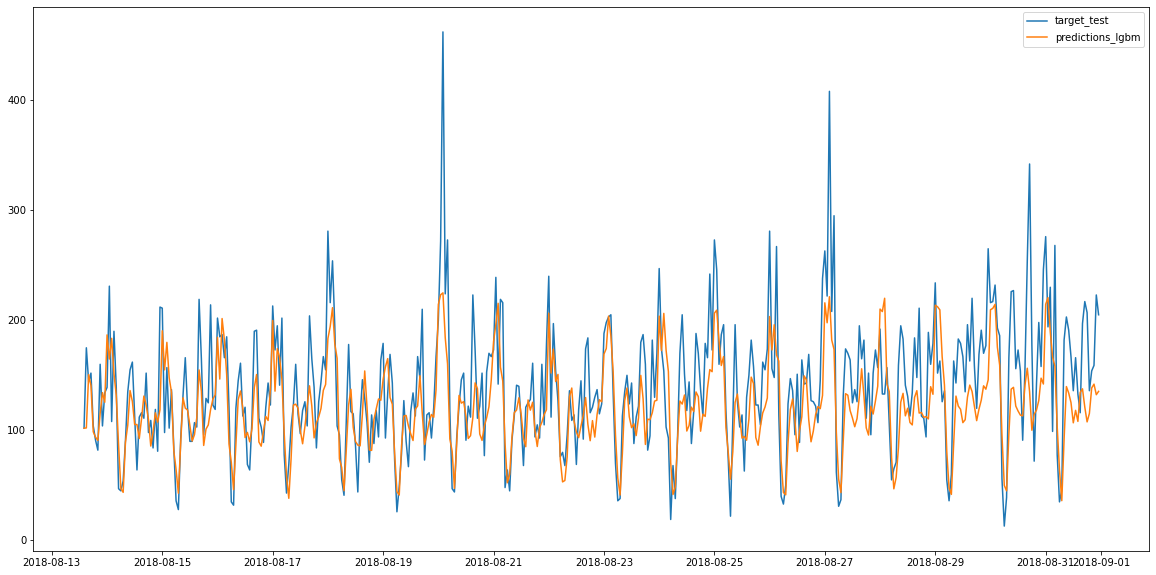

In [34]:
predictions_lgbm_df = pd.DataFrame(data=predictions_lgbm, index=target_test.index)

plt.figure(figsize=(20, 10))
plt.plot(target_test, label='target_test')
plt.plot(predictions_lgbm_df, label='predictions_lgbm')
plt.legend(loc='best')
plt.show()

**Вывод**

На тестовой выборке результаты получились значительно хуже, чем на валидационной из-за того, что временной ряд нестационарный. <br>На валидационной выборке мы смогли достичь необходимых результатов средней ошибки модели RMSE меньше 48 на пяти моделях из пяти рассматриваемых моделей. Все модели дали нужные результат RMSE.
<br><br>При этом на тестовой выборке только 3 модели из 5 смогли достичь необходимого результата RMSE.
<br> Лучшие результаты дала модель это модель LGBMRegressor(n_estimators=50) с показателями:
* MSE наилучшей модели на валидационной выборке: 1905.3450435009452 
* Средняя ошибка модели(RMSE): 43.65025822948755